In [19]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

def get_centre(x_top,y_top,x_bottom,y_bottom):
    return (int((x_bottom+x_top)//2),int((y_bottom+y_top)//2))
def get_width_and_height(x_top,y_top,x_bottom,y_bottom):
    width=(x_bottom-x_top)
    height=(y_bottom-y_top)
    if(width<0 or height<0):
        raise ValueError('negative dimensions found ',x_top,y_top,x_bottom,y_bottom)
    return width/512,height/512

def get_window(centre):
    x=centre[0]
    y=centre[1]
    column=x//64+1
    row=y//64+1
    cell=(row-1)*8+column-1
    return cell



columns=['filename','count','prob1','x1','y1','width1','height1','aeroplane1','bicycle1','bird1','boat1','bottle1','bus1','car1','cat1','chair1','cow1','diningtable1','dog1','horse1','motorbike1','person1','pottedplant1','sheep1','sofa1','train1','tvmonitor1','prob2','x2','y2','width2','height2','aeroplane2','bicycle2','bird2','boat2','bottle2','bus2','car2','cat2','chair2','cow2','diningtable2','dog2','horse2','motorbike2','person2','pottedplant2','sheep2','sofa2','train2','tvmonitor2']

windows=[]
for i in range(0,64):
    windows.append(pd.DataFrame(columns=columns,data=np.zeros((17125,52)),index=range(0,17125),dtype=np.float64))


files=os.listdir('Annotations/')


for i,file in enumerate(files):
    if i%500==0:
        print(f'Working on {i} image')
    
    mytree=ET.parse('Annotations/'+file)
    root=mytree.getroot()
    for x in root:
        if(x.tag=='object'):
            upper_pad=max((512-shape[0])//2,0)
            lower_pad=max((512-shape[0]-upper_pad),0)
            left_pad=max((512-shape[1])//2,0)
            right_pad=max((512-shape[1]-left_pad),0)
            for j in x.findall('bndbox'):
                for k in j.findall('xmin'):
                    x_top=int(float(k.text)+left_pad)
                for k in j.findall('xmax'):
                    x_bottom=int(float(k.text)+left_pad)
                for k in j.findall('ymin'):
                    y_top=int(float(k.text)+upper_pad)
                for k in j.findall('ymax'):
                    y_bottom=int(float(k.text)+upper_pad)
            centre=get_centre(x_top,y_top,x_bottom,y_bottom)
            window_number=int(get_window(centre))
            already_detected_objects=windows[window_number]['count'][i]
            if(already_detected_objects!=2):
                windows[window_number]['count'][i]+=1
                
                w=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[0]
                h=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[1]
                if w>=h:
                    windows[window_number]['prob1'][i]=1
                    windows[window_number]['width1'][i]=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[0]
                    windows[window_number]['height1'][i]=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[1]
                    windows[window_number]['x1'][i]=(centre[0]%64)/64
                    windows[window_number]['y1'][i]=(centre[1]%64)/64
                    windows[window_number][x[0].text+str(1)][i]=1
                else:
                    windows[window_number]['prob2'][i]=1
                    windows[window_number]['x2'][i]=(centre[0]%64)/64
                    windows[window_number]['y2'][i]=(centre[1]%64)/64
                    windows[window_number]['width2'][i]=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[0]
                    windows[window_number]['height2'][i]=get_width_and_height(x_top,y_top,x_bottom,y_bottom)[1]                   
                    windows[window_number][x[0].text+str(2)][i]=1
        if x.tag=='filename':
            img=cv2.imread('JPEGImages/'+x.text,1)
            shape=img.shape
            for j in range(64):
                windows[j]['filename'][i]=str(i)+'.jpg'
print('Done!')

Working on 0 image
Done!


In [6]:
(274%64)/64

0.28125

In [238]:
windows[43].loc[1]

filename       2009_000001.jpg
count                        0
prob1                        0
x1                           0
y1                           0
width1                       0
height1                      0
prob2                        0
x2                           0
y2                           0
width2                       0
height2                      0
aeroplane                    0
bicycle                      0
bird                         0
boat                         0
bottle                       0
bus                          0
car                          0
cat                          0
chair                        0
cow                          0
diningtable                  0
dog                          0
horse                        0
motorbike                    0
person                       0
pottedplant                  0
sheep                        0
sofa                         0
train                        0
tvmonitor                    0
Name: 1,

In [24]:
# cross checking
i=28
width1=windows[i]['width2'][0]
height1=windows[i]['height2'][0]
x_top=int(windows[i]['x2'][0]-(width1)//2)
y_top=int(windows[i]['y2'][0]-(height1)//2)
x_bottom=int(windows[i]['x2'][0]+(width1)//2)
y_bottom=int(windows[i]['y2'][0]+(height1)//2)
print(x_top,y_top,x_bottom,y_bottom)

187 107 361 357


6 6 13 13
(512, 512, 3)
187 107
361 357


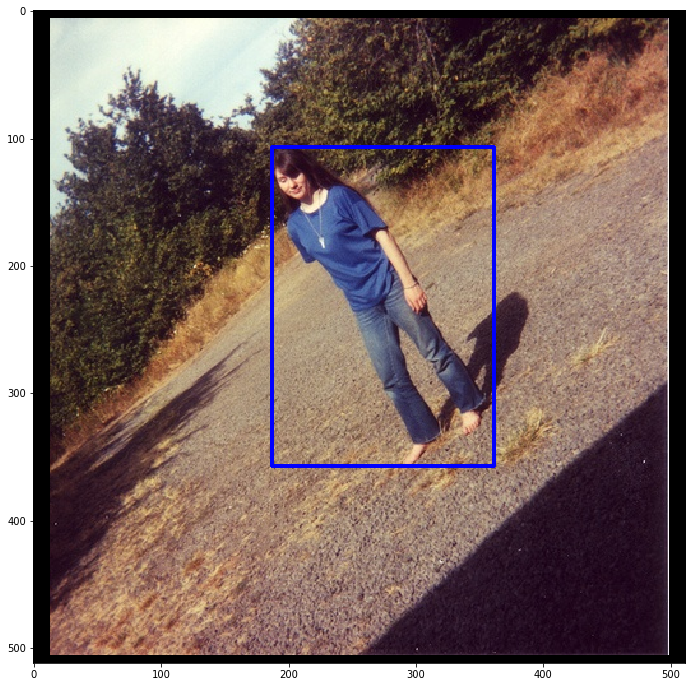

In [26]:
# cross checking

import matplotlib.pyplot as plt
%matplotlib inline
img=cv2.imread('JPEGImages/2007_000027.jpg',1)

x
shape=img.shape
upper_pad=max((512-shape[0])//2,0)
lower_pad=max((512-shape[0]-upper_pad),0)
left_pad=max((512-shape[1])//2,0)
right_pad=max((512-shape[1]-left_pad),0)
print(upper_pad,lower_pad,left_pad,right_pad)
img = np.pad(img,((upper_pad,lower_pad),(left_pad,right_pad),(0,0)),mode='constant')
print(img.shape)
print(x_top,y_top)
print(x_bottom,y_bottom)
cv2.rectangle(img,(x_top,y_top),(x_bottom,y_bottom),(255,0,0),2)
# cv2.circle(img,(x,y),5,(255,0,0),2)
# cv2.rectangle(img,(251+left_pad,242+upper_pad),(334+left_pad,500+upper_pad),(255,255,0),2)
# cv2.rectangle(img,(74+left_pad,1+upper_pad),(272+left_pad,462+upper_pad),(255,0,255),2)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



In [16]:
for i in range(64):
    windows[i].to_csv('window'+str(i+1)+'.csv')

In [20]:
windows[28].loc[0]

filename        2007_000027.jpg
count                         1
prob1                         0
x1                            0
y1                            0
width1                        0
height1                       0
aeroplane1                    0
bicycle1                      0
bird1                         0
boat1                         0
bottle1                       0
bus1                          0
car1                          0
cat1                          0
chair1                        0
cow1                          0
diningtable1                  0
dog1                          0
horse1                        0
motorbike1                    0
person1                       0
pottedplant1                  0
sheep1                        0
sofa1                         0
train1                        0
tvmonitor1                    0
prob2                         1
x2                          274
y2                          232
width2                      175
height2 